
The maximum height in the vaccum was: 1.27E-04 m.
The horizontal distance traveled in the vaccum was: 8.83E-04 m.
The time of flight in the vacuum was: 1.02E-02 seconds.


The maximum height acheived with air resistance was: 1.21E-04 m.
The horizontal distance traveled with air resistance was: 7.99E-04 m.
The time of flight with air resistance was: 9.94E-03 seconds.



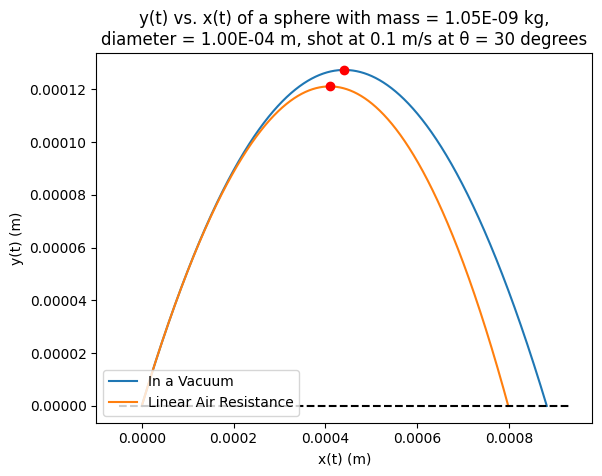


Due to a multi-layered loop, generating the next graph takes awhile... progress bar is below.
	Currently on cycle: 1 out of 15
	Currently on cycle: 2 out of 15
	Currently on cycle: 3 out of 15
	Currently on cycle: 4 out of 15
	Currently on cycle: 5 out of 15
	Currently on cycle: 6 out of 15
	Currently on cycle: 7 out of 15
	Currently on cycle: 8 out of 15
	Currently on cycle: 9 out of 15
	Currently on cycle: 10 out of 15
	Currently on cycle: 11 out of 15
	Currently on cycle: 12 out of 15
	Currently on cycle: 13 out of 15
	Currently on cycle: 14 out of 15
	Currently on cycle: 15 out of 15





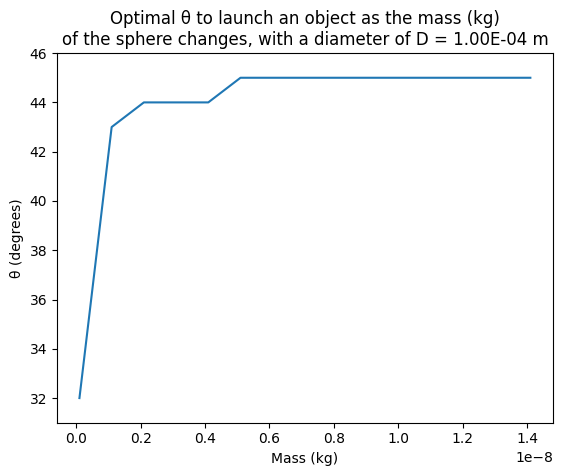

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Parameters
gravity = 9.81 #m/s^2
B = 1.6e-4 #Ns/m^2
diameter = 1e-4 #m
mass = (4/3) * math.pi * (diameter/2.0)**3 * (2000) #volume * mass density = mass (kg)
b = B*diameter
theta = float(input("Input value for θ in degrees:")) #takes user input for θ value
radian = theta*(math.pi/180)
dt = 1e-7
speed = 0.1 #m/s
v_x_0 = math.cos(radian) * speed #suppose the sphere was shot at speed at angle theta
v_y_0 = math.sin(radian) * speed #^^^

def terminal_analytical_method(mass,diameter,time):
    result = (mass*gravity/(b))*(1-math.e**( (-b*time)/mass) )
    return result

#initializing variables and lists for vacuum projectile motion
v_y = v_y_0 
time = 0
position_x = 0
position_y = 0
position_x_list_v = [position_x]
position_y_list_v = [position_y]
time_list_v = [time]

i_v = 0 #counter variable used to find peak of motion
while(v_y>0): #while velocity is moving in the positive up direction, keep looping
    time = time + dt #iterate time
    position_x = position_x + (v_x_0 * dt) #iterate position in x-axis
    v_y = v_y - (gravity * dt) #find new speed from gravity
    position_y = position_y + (v_y * dt) #iterate position in y-axis
    
    position_x_list_v.append(position_x) #add new info to all 3 vacuum lists
    position_y_list_v.append(position_y)
    time_list_v.append(time)
    i_v = i_v + 1 #incremement counter variable by 1

while(position_y >0): #while the sphere is still in the air, but moving in the negative velocity direction
    time = time + dt #iterate time
    position_x = position_x + (v_x_0 * dt) #iteration position in x-axis
    v_y = v_y + (gravity * dt) #find new speed from gravity
    position_y = position_y - (v_y * dt) #iterate position in y-axis
    
    position_x_list_v.append(position_x) #add new info to all 3 vacuum lists
    position_y_list_v.append(position_y)
    time_list_v.append(time)

#initializing variables and lists for linear air resistance projectile motion
time = 0
position_x = 0
position_y = 0
v_x = v_x_0
v_y = v_y_0
position_x_list = [position_x]
position_y_list = [position_y]
time_list = [time]

Terminal = terminal_analytical_method(mass,diameter,300000) #finding the terminal velocity, using a large time value
tau = mass/b #using tau as a substitute variable to have less writing

i = 0 #counter variable used to find peak of motion
while(v_y>0): #while velocity is moving in the positive up direction, keep looping
    time = time + dt #iterate time
    v_x = v_x_0*math.e**(-1*time/tau) #v_x(t)
    v_y = -Terminal + (v_y_0 + Terminal)*math.e**(-1*time/tau) #v_y(t)
    
    position_x = position_x + (v_x * dt) #iterates position in x-axis
    position_y = position_y + (v_y * dt) #iterates position in y-axis
    
    position_x_list.append(position_x) #add new info to all 3 air resistance lists
    position_y_list.append(position_y)
    time_list.append(time)
    i = i + 1 #iterate counter variable

while(position_y>0): #while the sphere is still in the air, but moving in the negative velocity direction
    time = time + dt #iterate time
    v_x = v_x_0*math.e**(-1*time/tau) #v_x(t)
    v_y = -Terminal + (v_y_0 + Terminal)*math.e**(-1*time/tau) #v_y(t)
    
    position_x = position_x + (v_x * dt) #iterates position in x-axis
    position_y = position_y + (v_y * dt) #iterates position in y-axis
    
    position_x_list.append(position_x) #add new info to all 3 air resistance lists
    position_y_list.append(position_y)
    time_list.append(time)

#print statements comparing the two plots of motion
print('\nThe maximum height in the vaccum was: %0.2E m.'%position_y_list_v[i_v])
print('The horizontal distance traveled in the vaccum was: %0.2E m.'%(position_x_list_v[-1]))
print('The time of flight in the vacuum was: %0.2E seconds.\n'%(time_list_v[-1]))
print('\nThe maximum height acheived with air resistance was: %0.2E m.'%position_y_list[i])
print('The horizontal distance traveled with air resistance was: %0.2E m.'%(position_x_list[-1]))
print('The time of flight with air resistance was: %0.2E seconds.\n'%(time_list[-1]))

#makes graph
plt.figure()
plt.plot(position_x_list_v, position_y_list_v) #plots vacuum motion
plt.plot(position_x_list, position_y_list) #plots air resistance motion
plt.plot(position_x_list[i], position_y_list[i], 'ro') #puts marker at peak of air resistance motion
plt.plot(position_x_list_v[i_v], position_y_list_v[i_v], 'ro') #puts marker at peak of vacuum motion
plt.hlines(y=0,xmin= -0.00005, xmax=position_x_list_v[-1]+0.00005, colors='black', linestyles='--') #makes dotted line at 0
plt.title('y(t) vs. x(t) of a sphere with mass = %0.2E kg,\ndiameter = %0.2E m, shot at %0.1f m/s at θ = %d degrees'%(mass,diameter,speed,theta))
plt.legend(['In a Vacuum','Linear Air Resistance'], loc = 'lower left')
plt.xlabel('x(t) (m)')
plt.ylabel('y(t) (m)')
plt.show()

mass = 1e-10
dm = 1e-9
optimal = []
mass_List = []
counter = 1
c_max = 15

print("\nDue to a multi-layered loop, generating the next graph takes awhile... progress bar is below.")
while(counter < c_max+1): #decides how many different masses we want to iterate for.
    print("\tCurrently on cycle: %d out of %d"%(counter,c_max)) #progress print statement
    angle = 0 #resets angle variable and distance list
    distance = []
    while(angle<91): #goes through angles 0-90
        radian = angle * (math.pi/180) #converts degrees to radians
        v_x_0 = math.cos(radian) * speed #suppose the sphere was shot at speed at angle theta
        v_y_0 = math.sin(radian) * speed #^^^
        time = 0 #initializes variables
        position_x = 0
        position_y = 0
        v_x = v_x_0
        v_y = v_y_0

        Terminal = terminal_analytical_method(mass,diameter,300000) #finding the terminal velocity, using a large time value
        tau = mass/b #using tau as a substitute variable to have less writing

        while(v_y>0): #while velocity is moving in the positive up direction, keep looping
            time = time + dt #iterate time
            v_x = v_x_0*math.e**(-1*time/tau) #v_x(t)
            v_y = -Terminal + (v_y_0 + Terminal)*math.e**(-1*time/tau) #v_y(t)
    
            position_x = position_x + (v_x * dt) #iterates position in x-axis
            position_y = position_y + (v_y * dt) #iterates position in y-axis

        while(position_y>0): #while the sphere is still in the air, but moving in the negative velocity direction
            time = time + dt #iterate time
            v_x = v_x_0*math.e**(-1*time/tau) #v_x(t)
            v_y = -Terminal + (v_y_0 + Terminal)*math.e**(-1*time/tau) #v_y(t)
    
            position_x = position_x + (v_x * dt) #iterates position in x-axis
            position_y = position_y + (v_y * dt) #iterates position in y-axis

        distance.append(position_x)
        angle = angle + 1

    t = max(distance)
    optimal.append(distance.index(t))
    mass_List.append(mass)
    mass = mass + dm
    counter = counter + 1
print("\n\n")
#plots graph
plt.figure()
plt.plot(mass_List, optimal) #plots mass list and opitmal angle at each mass
plt.title('Optimal θ to launch an object as the mass (kg)\nof the sphere changes, with a diameter of D = %0.2E m'%(diameter))
plt.xlabel('Mass (kg)')
plt.ylabel('θ (degrees)')
plt.ylim(optimal[0]-1,46)
plt.show()